<a href="https://colab.research.google.com/github/Kuldip-Rajput/Capstone-project-Bike-sharing-demand-prediction/blob/main/Capstone_project_Google_play_store_app_review_analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Google Play Store App Review Analysis (EDA)


##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -**Omprakash Mohan Nikam
##### **Team Member 2 -**Kuldip Kailas Rajput
##### **Team Member 3 -**Devendra Shivadas Shemale
##### **Team Member 4 -**Hitendra Shantaram Bhamare

# **Project Summary -**

The google play store is one of the largest and most popular Android app store. It has an enormous amount of data that can be used to make an optimal model.The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. We have used a raw data set of Google Play Store from the ALmaBetter website. This data set contains 13 different features that can be used for predicting whether an app will be successful or not using different features. This data set is scraped from the Google Play Store. This journal talks about different classifier models that we used for prediction purposes and finding which one gives the highest accuracy. This journal also gives detailed information on feature extraction and the complete Data visualization done on this data set.


# **GitHub Link -**  

https://github.com/Kuldip-Rajput/Google-play-store-app-review-analysis-EDA-

# **Problem Statement**



**To perform Exploratory Data Analysis (EDA) in order to generate insights to understand customer demands better and thus help developers to popularize the product.**

#### **Define Your Business Objective?**

The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline 

### Dataset Loading

In [ ]:
# loading dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ps_df = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
ur_df = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

### Dataset First View

In [ ]:
# dataset first look 
ps_df.head().T

,0,1,2,3,4
App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Sketch - Draw & Paint,Pixel Draw - Number Art Coloring Book
Category,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN
Rating,4.1,3.9,4.7,4.5,4.3
Reviews,159,967,87510,215644,967
Size,19M,14M,8.7M,25M,2.8M
Installs,"10,000+","500,000+","5,000,000+","50,000,000+","100,000+"
Type,Free,Free,Free,Free,Free
Price,0,0,0,0,0
Content Rating,Everyone,Everyone,Everyone,Teen,Everyone
Genres,Art & Design,Art & Design;Pretend Play,Art & Design,Art & Design,Art & Design;Creativity


In [ ]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [ ]:
# dataset rows & columns count
ps_df.shape

(10841, 13)

Play store data has 10841 rows and 13 columns

In [ ]:
ur_df.shape

(64295, 5)

User reviews data has 64295 rows and 5 columns 

### Dataset Information

In [ ]:
# dataset info
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [ ]:
# dataset duplicate value count
ps_df.duplicated().sum()

483

Play store data has 483 duplicate values.

In [ ]:
ur_df.duplicated().sum()

33616

User reviews data has 33616 duplicate values.

#### Missing Values/Null Values

In [ ]:
# Missing values/null values count
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Play store data has some null values. Rating column has 1474 null values

In [ ]:
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

User reviews has 26868 null value in every column (except app column).




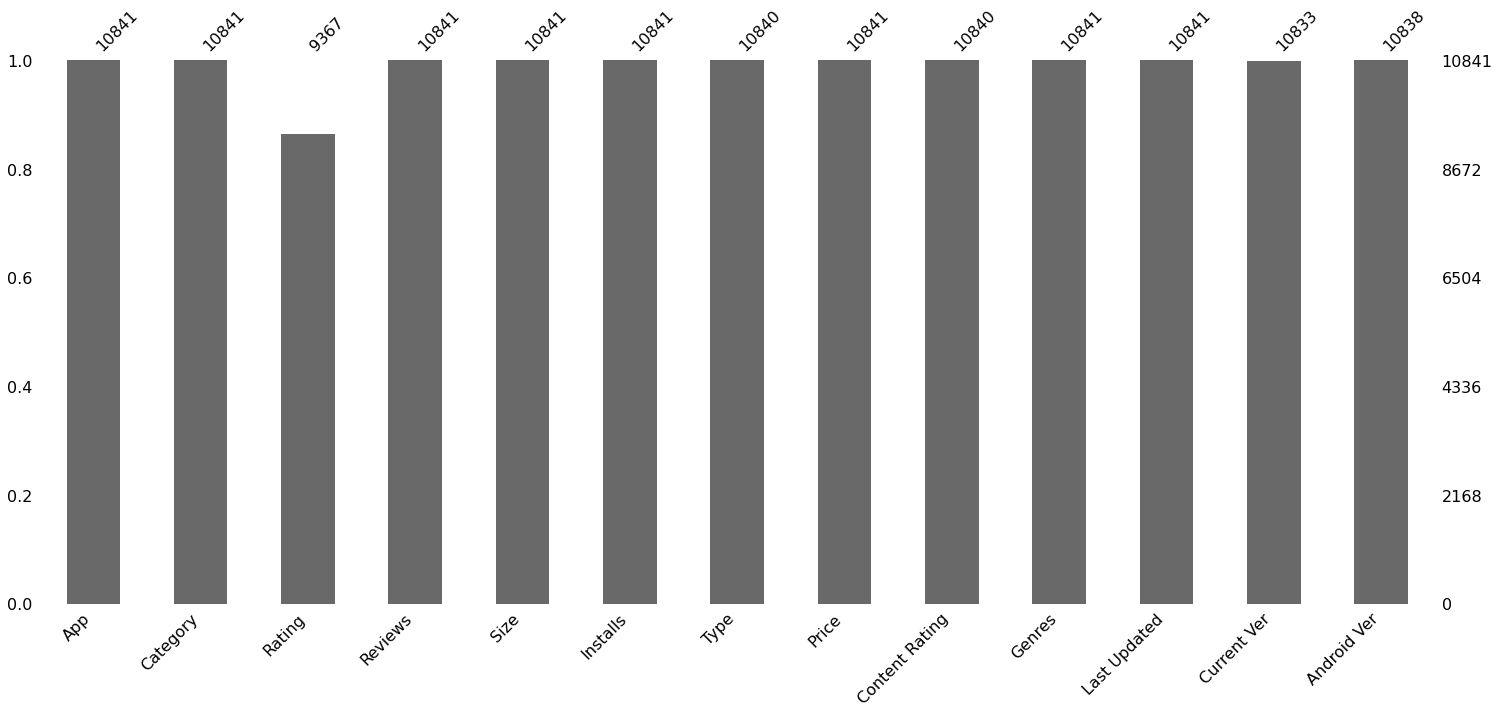

In [ ]:
# Visualizing the missing values
#Checking null value by plotting bar plot.
plt.figure(figsize=(8,6))
msno.bar(ps_df)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
msno.bar(ur_df)
plt.show()

### What did you know about your dataset?

The dataset given is a dataset from Play Store, and we have to analysis the app information and user review and the insights behind it.

 The goal is to understand user preference in app categories. It beneficial for
 developer to development of app in such categories.
 The Play store dataset has 10841 rows and 13 columns and User Review datset has 64295 row and 5 columns.

Following categories has missing values in play store dataset:-

1.   Rating - 1474
1.   Type - 1
2.   Current Ver - 8
2. Android Ver - 3
1.   Content Rating - 1




Following categories has missing values in user review dataset:-

1.App           -                0

2.Translated_Review   -      26868

3.Sentiment      -            26863

4.Sentiment_Polarity    -     26863

5.Sentiment_Subjectivity   - 26863

## ***2. Understanding Your Variables***

In [ ]:
# Dataset columns
#1.Play store data set columns
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#2.User review data set columns
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Dataset describe
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 


PLay Store data set

App : Name of the applications





Category : Category of the applications

Rating : Average rating given by the customers/reviewers

Size : Size of the application

Installs : Total Installations done(assuming Today)

Type : Free/Paid type of applications

Price : Cost price of applications

Content Rating : Age bar of the application for the user

Genres : Sub category of the applications

Last Updated : Application last updated on the given date

Current Ver : Current version of the applications

Android Ver : Android version of the application

### Check Unique Values for each variable.

In [ ]:
# Check unique values for each variable.
# Play store dataset
#1. apps
print(ps_df["App"].unique())
print(ps_df["App"].nunique())

['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
9660


In [ ]:
#2.Category
print(ps_df["Category"].unique())
print(ps_df["Category"].nunique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
34


In [ ]:
#3.Rating
print(ps_df["Rating"].unique())
print(ps_df["Rating"].nunique())

[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
40


In [ ]:
#4.Size
print(ps_df["Size"].unique())
print(ps_df["Size"].nunique())

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '556k' '526k' '76M' '7.6M'

In [ ]:
#5.Installs
print(ps_df["Installs"].unique())
print(ps_df["Installs"].nunique())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']
22


In [ ]:
#6.Type
print(ps_df["Type"].unique())
print(ps_df["Type"].nunique())

['Free' 'Paid' nan '0']
3


In [ ]:
#7.Content Rating
print(ps_df["Content Rating"].unique())
print(ps_df["Content Rating"].nunique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]
6


In [ ]:
#8.Genres
print(ps_df["Genres"].unique())
print(ps_df["Genres"].nunique())

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle

In [ ]:
#8.Last Updated
print(ps_df["Last Updated"].unique())
print(ps_df["Last Updated"].nunique())

['January 7, 2018' 'January 15, 2018' 'August 1, 2018' ...
 'January 20, 2014' 'February 16, 2014' 'March 23, 2014']
1378


In [ ]:
#9.Current Ver
print(ps_df["Current Ver"].unique())
print(ps_df["Current Ver"].nunique())

['1.0.0' '2.0.0' '1.2.4' ... '1.0.612928' '0.3.4' '2.0.148.0']
2832


In [ ]:
#10.Android Ver
print(ps_df["Android Ver"].unique())
print(ps_df["Android Ver"].nunique())

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']
33


In [ ]:
# User review  dataset
#1.Translated_Review
print(ur_df["Translated_Review"].unique())
print(ur_df["Translated_Review"].nunique())

['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'
 'This help eating healthy exercise regular basis' nan ...
 'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.'
 'I property business got link SMS happy performance still guys need raise bar guys Cheers'
 'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active']
27994


In [ ]:
#2.Sentiment_Polarity
print(ur_df["Sentiment_Polarity"].unique())
print(ur_df["Sentiment_Polarity"].nunique())

[ 1.          0.25               nan ... -0.52857143 -0.37777778
  0.17333333]
5410


In [ ]:
#3.Sentiment_Subjectivity
print(ur_df["Sentiment_Subjectivity"].unique())
print(ur_df["Sentiment_Subjectivity"].nunique())

[0.53333333 0.28846154        nan ... 0.51145833 0.7172619  0.2594697 ]
4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# 1. CLEAN SIZE DATA AND CHANGE DATA TYPE OBJECT TO FLOAT

# convert data frame to list 
size_list = ps_df['Size'].tolist()

# define function for data cleaning

def correct_size(size_list):
  corrected_list = []
  for size in size_list:
    if 'M' in size :
      size = size.replace('M', '')    
      size = float(size)
    elif 'K' in size:
      size = size.replace('K', '')
      size = float(size)
      size = size/1024              ## 1M = 1024 K
    else:
      size = float(0.00)
    corrected_list.append(size)  
  return corrected_list  


# function apply on list we created and assign that value to size data frame 
ps_df['size'] = correct_size(size_list)

In [ ]:
ps_df['size'].sample(10)

6882      0.0
10076    54.0
1195     17.0
9940      4.0
4431      2.9
511       5.9
8249      9.5
8797     80.0
3104      0.0
10585     0.0
Name: size, dtype: float64

In Size variables  'M' and 'K' sign refering megabyte and kilobytes . We remove that by defining function  correct_size .

In [ ]:
# 2. CLEAN PRICE DATA AND CHANGE DATA TYPE OBJECT TO FLOAT

#convert price datafram to list 
price_list = ps_df['Price'].tolist()

# define functiuon for data claening of price column 
def corrected_price(price_list):
  corrected_list = []
  for price in price_list:
    if '$' in price :
      price = price.replace('$', '')
      price = (price)

    corrected_list.append(price)
  return corrected_list

In [ ]:
ps_df['Price'] = corrected_price(price_list)

In [ ]:
ps_df['Price'] = pd.to_numeric(ps_df['Price'],errors='coerce')

In [ ]:
ps_df['Price'].sample(10)

6314     0.0
3266     0.0
10800    0.0
3824     0.0
8029     0.0
467      0.0
9468     0.0
175      0.0
5502     0.0
8824     0.0
Name: Price, dtype: float64

In Price variables we have '$' sign . we remove that by defining function  corrected_price .

In [ ]:
# 3. CLEAN REVIEWS DATA AND CHANGE DATA TYPE OBJECT TO FLOAT

#convert data frame to list 
Reviews_list = ps_df['Reviews'].tolist()

# define function to clean data  remove ('m' = 1,000,000(million)
def corrected_Reviews(Reviews_list):
  corrected_Reviews = []
  for Reviews in Reviews_list:
    if 'M' in Reviews :
      Reviews = Reviews.replace('M', '')
      Reviews = (Reviews)*1000000       ## 1 million = 1000000

    corrected_Reviews.append(Reviews)

  return corrected_Review




In [ ]:
# function apply on list we created and assign that value to price data frame
ps_df['Reviews'] = corrected_Reviews(Reviews_list)

In [ ]:
# data cleaning is done now change the data type object to float
ps_df['Reviews'] = pd.to_numeric(ps_df['Reviews'],errors='coerce')

In Reviews variables we have 'M' sign is denoted for million. We remove that sign and add 1 million = 1000000 by defining function corrected_Reviews .

In [ ]:
# 3. CLEAN INSTALLS DATA AND CHANGE DATA TYPE OBJECT TO FLOAT

## convert datafram to  list 
Installs_list = ps_df['Installs'].tolist()

def corrected_install(installs_list):
    corrected_install = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')

        if '+' in install:
            install = install.replace('+', '')
        install = (install)
        corrected_install.append(install)

    return corrected_install




In [ ]:
# function apply on list we created and assign that value to price data frame
ps_df['Installs'] = corrected_install(Installs_list)

In [ ]:
# data cleaning is done now change the data type object to float
ps_df['Installs'] = pd.to_numeric(ps_df['Installs'],errors='coerce')

In Installs variables we have '+' sign  and ' , ' . We remove that sign  by defining function corrected_install .





In [ ]:
# Rating column has Rating more than 5 
ps_df[ps_df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,0.0


In [ ]:
ps_df.drop([10472], inplace = True)

In [ ]:
# Check for null values 
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
size                 0
dtype: int64

Treating the null values
1. Play Store Dataset

In [ ]:
# We found 1474 row having null values in rating column. Replace null values with median of rating column.
medians =  ps_df['Rating'].median()
ps_df['Rating'].fillna(medians,inplace = True)

In [ ]:
# We also have 8 null values in Current Ver. Replace it with mode of Current Ver column.
mode = ps_df['Current Ver'].mode()
ps_df['Current Ver'].fillna(mode,inplace = True)


In [ ]:
# We also have 1 null values in Type column. Drop that value.
ps_df[ps_df['Type'].isnull()]
ps_df.drop([9148] , inplace = True)

In [ ]:
# We got 2 null value in Android Ver column. Drop that value.
ps_df[ps_df['Android Ver'].isnull()]          ## to see lable of row
ps_df.drop([4453],inplace = True)
ps_df.drop([4490],inplace = True)

In [ ]:
ps_df['Current Ver'].fillna(str(ps_df['Current Ver'].mode().values[0]), inplace = True)

In [ ]:
# check for null values 
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
size              0
dtype: int64

In [ ]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


Treating the null values
1. User review Dataset

In [ ]:
ur_df.head().T

,0,1,2,3,4
App,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
Translated_Review,I like eat delicious food. That's I'm cooking ...,This help eating healthy exercise regular basis,NaN,Works great especially going grocery store,Best idea us
Sentiment,Positive,Positive,NaN,Positive,Positive
Sentiment_Polarity,1.0,0.25,NaN,0.4,1.0
Sentiment_Subjectivity,0.533333,0.288462,NaN,0.875,0.3


In [ ]:
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# We found 26868 row having null values in Sentiment column. Replace null values with mode of Sentiment column.

mode = ur_df['Sentiment'].mode()
ur_df['Sentiment'].fillna(ur_df['Sentiment'].mode(), inplace = True)

In [ ]:
# We found 26868 row having null values in Sentiment_Polarity column. Replace null values with mode of Sentiment_Polarity column.
median = ur_df['Sentiment_Polarity'].median()
ur_df['Sentiment_Polarity'].fillna(ur_df['Sentiment_Polarity'].median() , inplace=True)

In [ ]:
# We found 26868 row having null values in Sentiment_Subjectivity column. Replace null values with mode of Sentiment_Subjectivity column.
median = ur_df['Sentiment_Subjectivity'].median()
ur_df['Sentiment_Subjectivity'].fillna(ur_df['Sentiment_Subjectivity'].median(), inplace = True)

In [ ]:
ur_df['Sentiment'].mode()
ur_df['Sentiment'].fillna('Positive', inplace = True)

ur_df['Translated_Review'].mode()
ur_df['Translated_Review'].fillna('Good',inplace = True)

In [ ]:
ur_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
# merge data frame by using inner joint beacause we want common obervation from both data fram
merged_dataframe = pd.merge(ps_df, ur_df, on ="App", how = "inner")

### What all manipulations have you done and insights you found?

In our dataset many variable contain various sign and symbol we need to remove that.

1.   In size variable we have a 'M' and 'K' they are referring megabyte and kilobyte. 
2.   In price variable we have dollar sign we removed that sign from record.

1.   In review variable we have 'M' referring million we remove sign and multiply 1E6 for certain record.
2.   In install variable we have a '+' and ',' we remove that sign from variables.

1.   In rating variable we have record that contain rating more than 5 we drop such observation.

Tratment of null values.

*Play store dataset


1.   In rating variable we have 1474 null values we fill that null values with the help of median. Because rating variable have numerical observations.
2.   In current ver we have 1 null values we fill null values with help mode. Because current ver contain catagorical information (text).

*User review dataset



In all variable contain 26868 null values (except app variable).
1.   In sentiment variable we fill the null value with the help of mode because variable contain catagorical information ( text).
2. In sentimental polarity we fill the null value with the help of median because variable contain numerical values.











## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

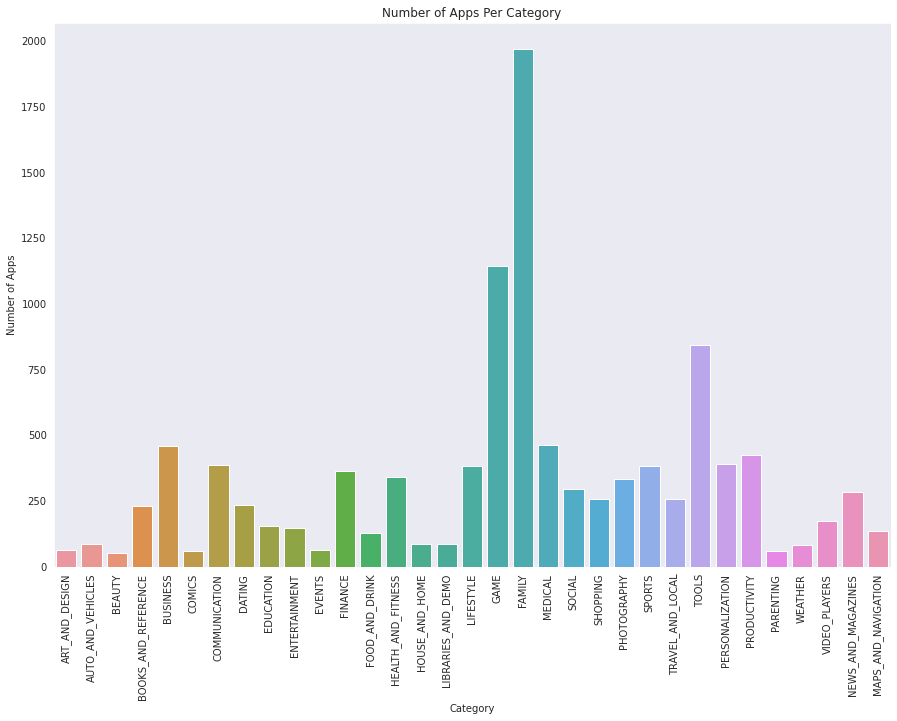

In [ ]:
# Chart - 1 visualization code
# get count or more use app 
sns.set_style('dark')
plt.figure(figsize=(15,10))
sns.countplot(x='Category', data=ps_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From above plotting we know that top 5 most avilable apps in the play store are from the categories of 'Family', 'Game', 'Tools' , 'Medical' and 'Productivity'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


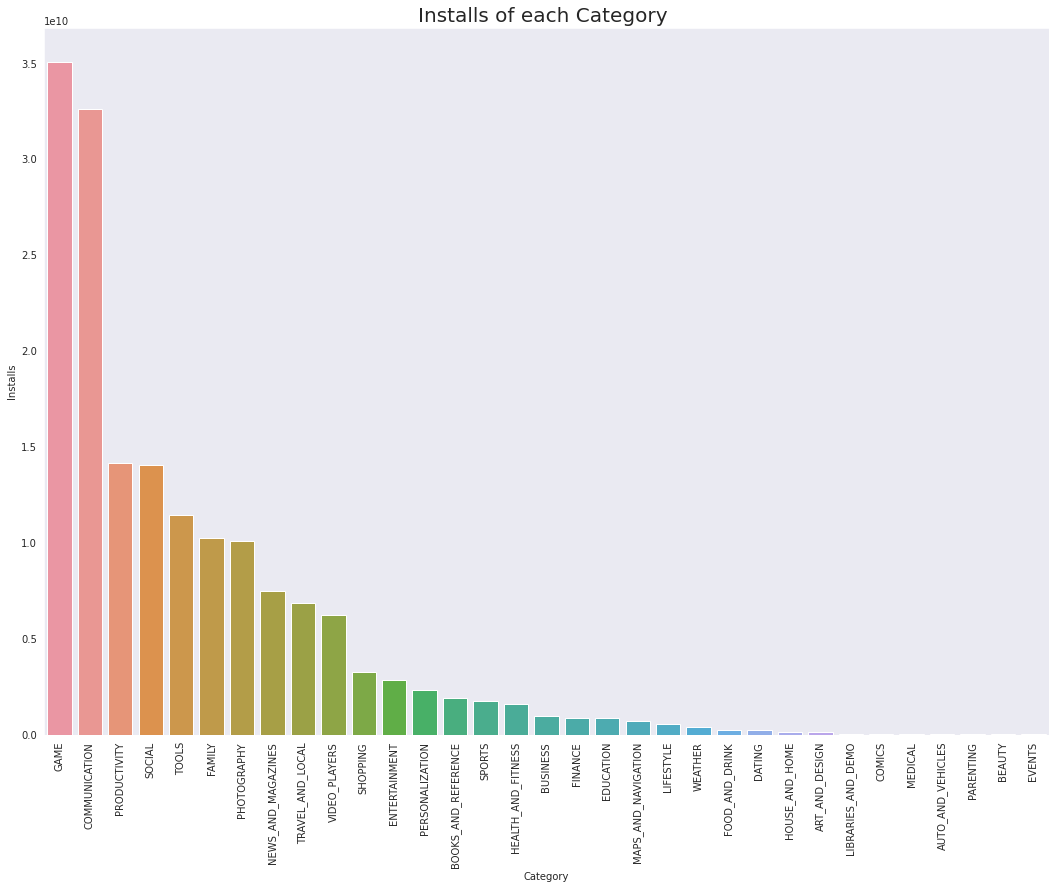

The category has highest number of installations are  : GAME, COMMUNICATION, PRODUCTIVITY, SOCIAL, TOOLS


In [ ]:
df=app_install_per_Category = ps_df.groupby('Category')['Installs'].sum().sort_values(ascending = False)
app_install_per_Category.head(5).index


plt.figure(figsize=(18,13))
sns.barplot(app_install_per_Category.index,app_install_per_Category.values)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title('Installs of each Category ',size = 20)
plt.xticks(rotation=90)
plt.show()
print(f'The category has highest number of installations are  : {", ".join(app_install_per_Category.head(5).index)}')
j

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.   

##### 2. What is/are the insight(s) found from the chart?

1. Game category are installed maximum.
2. After that communcation category are installed most.
3. Productivity and socal has approximatly same installed .
4. After that tools category has more installed .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1.   If we develope app in game, communication, prodictivity, social, tool its beneficial for business because this categoies has highest number of install comparely others in free type.
2.   Communication and social category has less amount of app available in play store but they are second and third most installed category respectively. Its beneficial to develope app in such category because less availability and higher demand.



#### Chart - 2

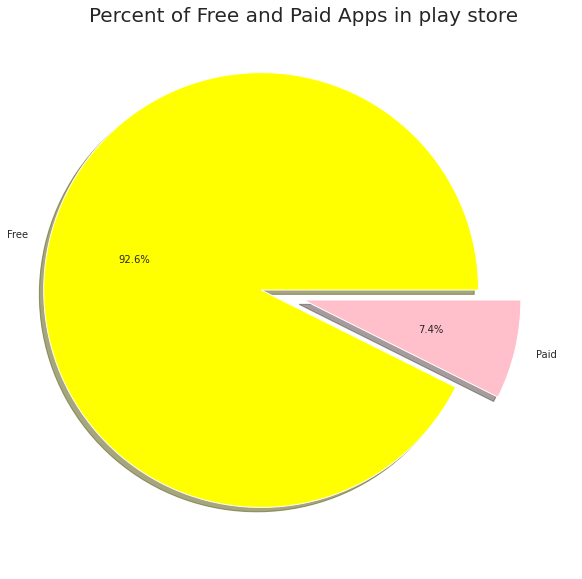

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,10))
type_name = ps_df['Type'].value_counts(sort = True).index           ## this code give name respect to count(value).
percentage = ps_df['Type'].value_counts(sort = True)                ## this code give value respect to names.
explode = (0.2,0)
plt.pie(percentage, explode=explode, labels=type_name,colors = ["yellow","pink"], autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free and Paid Apps in play store',size = 20)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole..

##### 2. What is/are the insight(s) found from the chart?

Here we can see that 92.6% apps are free and 7.4% apps are paid on google play store, so we can say that most of the apps are free on google play store.   

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, If you developed free app its more beneficial because free app have more install comparely paid app. Because free app is accessible for everyone. Paid app developed for specific niche then paid apps will be succeed. 

No, If we create paid for app for normal niche then it will not be purchased by general users. Because the free app is available for that niche.

#### Chart - 3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


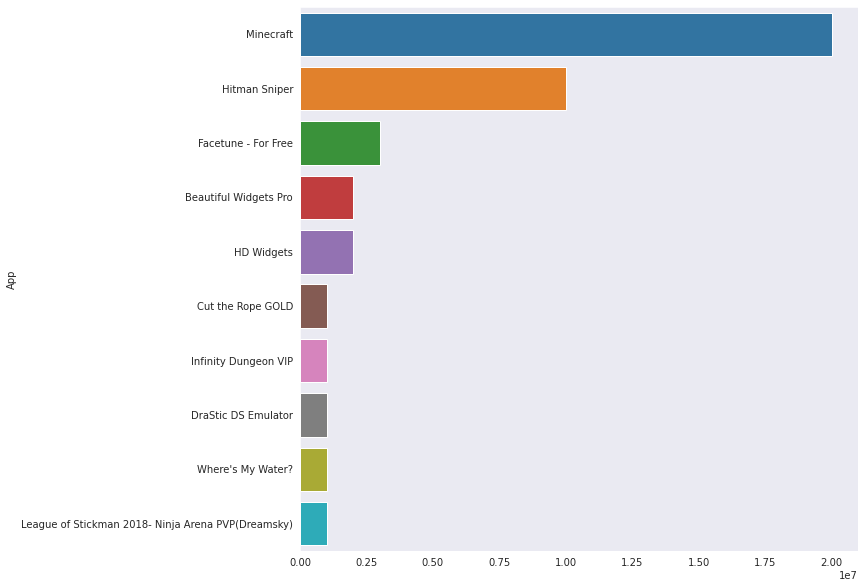

In [ ]:
# Chart - 3 visualization code
# Top 10 paid apps
plt.figure(figsize=(10,10))
paid_apps = ps_df[ps_df['Type'] == 'Paid']
paid_apps_count = paid_apps.groupby('App').Installs.sum().sort_values(ascending = False).head(10)
sns.barplot(paid_apps_count.values, paid_apps_count.index)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


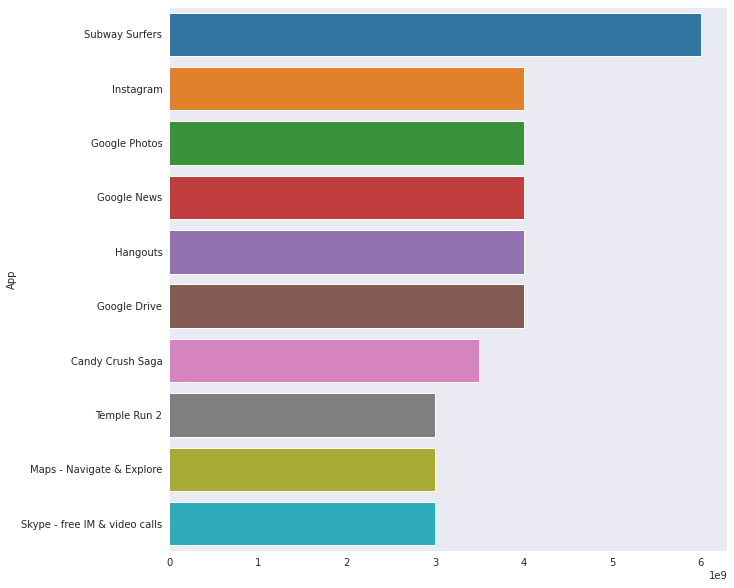

In [ ]:
# Top 10 free apps
plt.figure(figsize=(10,10))
free_apps = ps_df[ps_df['Type'] == 'Free']
free_apps_count = free_apps.groupby('App').Installs.sum().sort_values(ascending = False).head(10)
sns.barplot(free_apps_count.values,free_apps_count.index)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

1.Answer Here Paid apps from Family category are installed maximum through in overall installation (paid+free). 

2.Game category is at top.

3.There could be many reasons for this. One reason seems like app could be providing one to one consultation to the person which is more preferred over a generalised app which are mostly free.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Top downloaded paid and free apps are game and social so developed app in  it has positive business impact.

#### Chart - 4

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Rating')

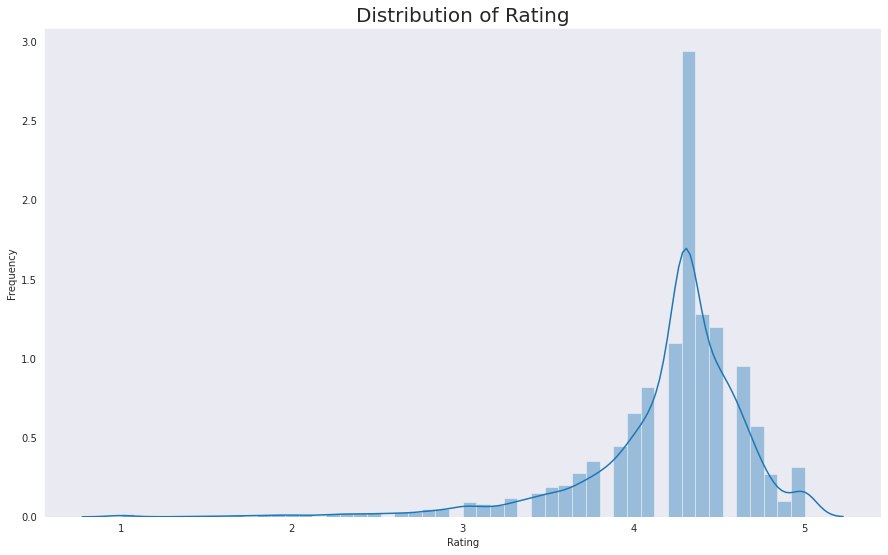

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.distplot(ps_df.Rating)
plt.title('Distribution of Rating',size = 20)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

1. From the above graph we can come to a conclusion that most of the apps in google playstore are rated in between 3.5 to 4.8

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Rating less than 3.5 is tell that the app is fail.

#### Chart - 5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x648 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

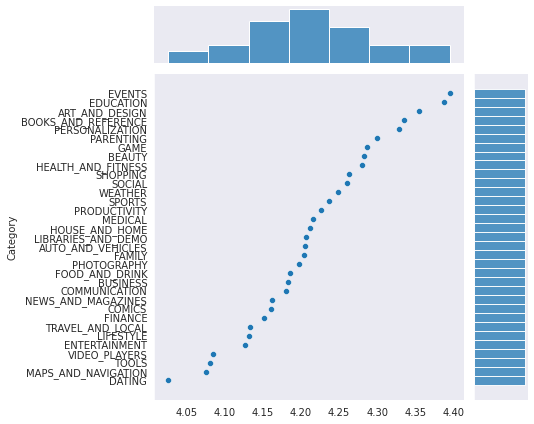

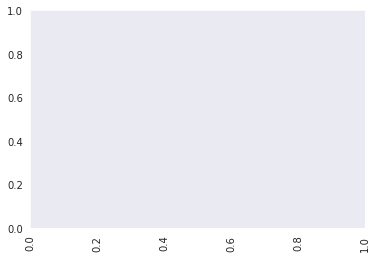

In [ ]:
# 3.what are the top 5 category has maximum average rating.
plt.figure(figsize=(15,9))
max_avg_rating =ps_df.groupby("Category")['Rating'].mean().sort_values(ascending = False)

plt.figure(figsize=(15,10))
sns.jointplot(max_avg_rating.values, max_avg_rating.index)
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x648 with 0 Axes>

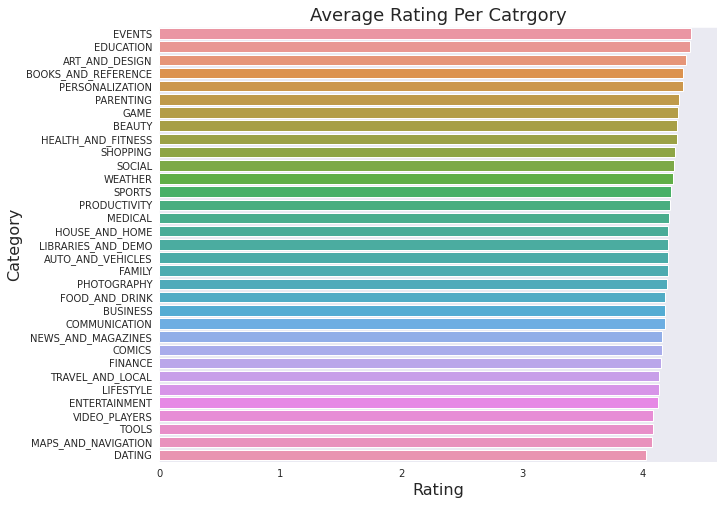

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(15,9))
dfcategory = ps_df.groupby('Category', as_index = False)['Rating'].mean()

dfcatigoryrank = dfcategory.nlargest(10841, 'Rating')


plt.figure(figsize = (10,8))
sns.barplot(data = dfcatigoryrank, x = 'Rating', y = 'Category')
plt.xlabel('Rating', fontsize = 16)
plt.ylabel('Category', fontsize = 16)
plt.title('Average Rating Per Catrgory', fontsize = 18)
plt.show()



##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.


##### 2. What is/are the insight(s) found from the chart?

1.Top 12 categories in terms of rating include category which has least number of installation except Game and Social.

2.Category with extremely low number of installation cant be compared with categories with extremely high installation in terms of ratings.

3.We will check the average ratings of top 10 categories in terms of installations.

4.Game and Social categories are very much popular and favourable by the users.  

5.Beauty category app has good enough ratings and installations but app availability is less.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, game and social categories has very much growth potential for business impact. Recently beauty industry has too much growth so its beneficial to developed app in such category.

#### Chart - 6

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


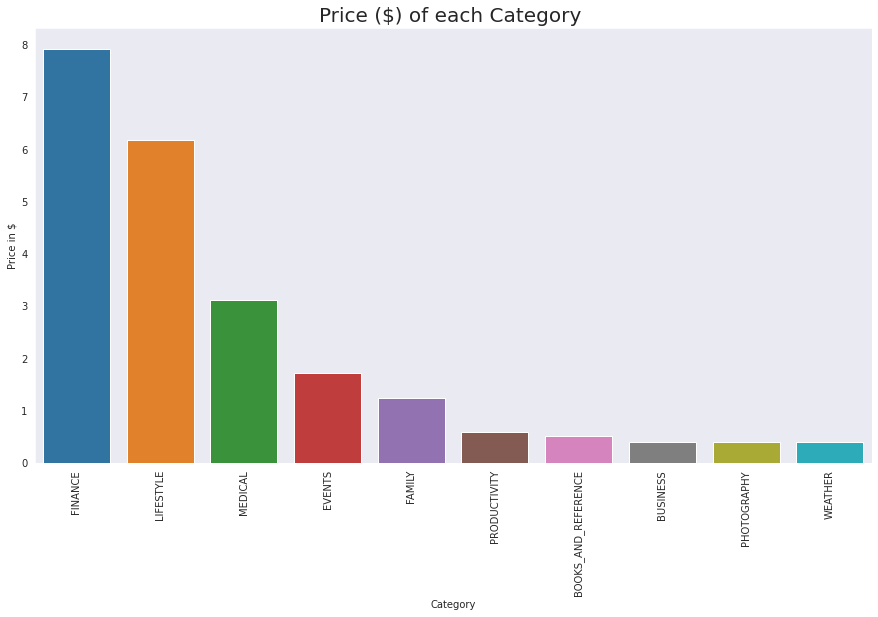

The top 10 paid app category are: FINANCE, LIFESTYLE, MEDICAL, EVENTS, FAMILY, PRODUCTIVITY, BOOKS_AND_REFERENCE, BUSINESS, PHOTOGRAPHY, WEATHER and its respective average app price in $ are [7.92576503 6.18028796 3.11006479 1.71859375 1.23530188 0.59181604
 0.51848485 0.40276087 0.40062687 0.39536585]


In [ ]:
# Chart - 6 visualization code
#7.top 10 category have average app price . 
avr_price = ps_df.groupby('Category')['Price'].mean().sort_values(ascending = False)
x= avr_price.head(10).index
y= avr_price.head(10).values

plt.figure(figsize=(15,8))
sns.barplot(x,y)
plt.xlabel("Category")
plt.ylabel("Price in $")
plt.title('Price ($) of each Category ',size = 20)
plt.xticks(rotation=90)
plt.show()
print(f'The top 10 paid app category are: {", ".join(avr_price.index[0:10])} and its respective average app price in $ are {avr_price.values[0:10]}')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


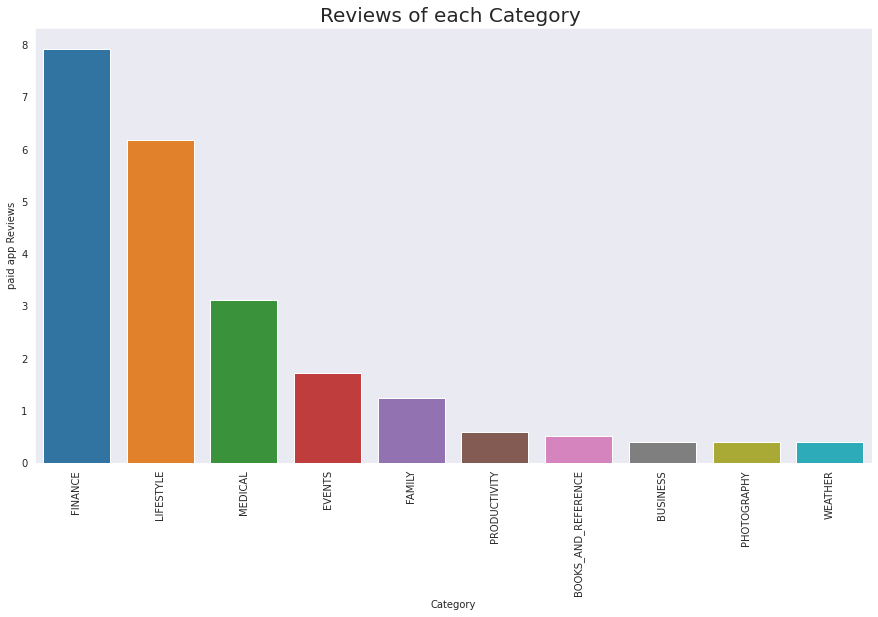

The category has maximum average Reviews are: FAMILY, GAME, PERSONALIZATION, PHOTOGRAPHY, TOOLS


In [ ]:
#8. top 5 category has max Reviews for paid apps .
paid_category = ps_df[ps_df["Type"]=="Paid"]
max_Reviews_per_Category =paid_category.groupby("Category").Reviews.sum().sort_values(ascending = False)
max_Reviews_per_Category.index
plt.figure(figsize=(15,8))
sns.barplot(x,y)
plt.xlabel("Category")
plt.ylabel("paid app Reviews")
plt.title('Reviews of each Category ',size = 20)
plt.xticks(rotation=90)
plt.show()
print(f'The category has maximum average Reviews are: {", ".join(max_Reviews_per_Category.index[0:5])}')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.


##### 2. What is/are the insight(s) found from the chart?

Top 5 paid app are from finance, lifestyle, medical, event, family.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, if developer develope paid app in such category there is positive business impact.

#### Chart - 7

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


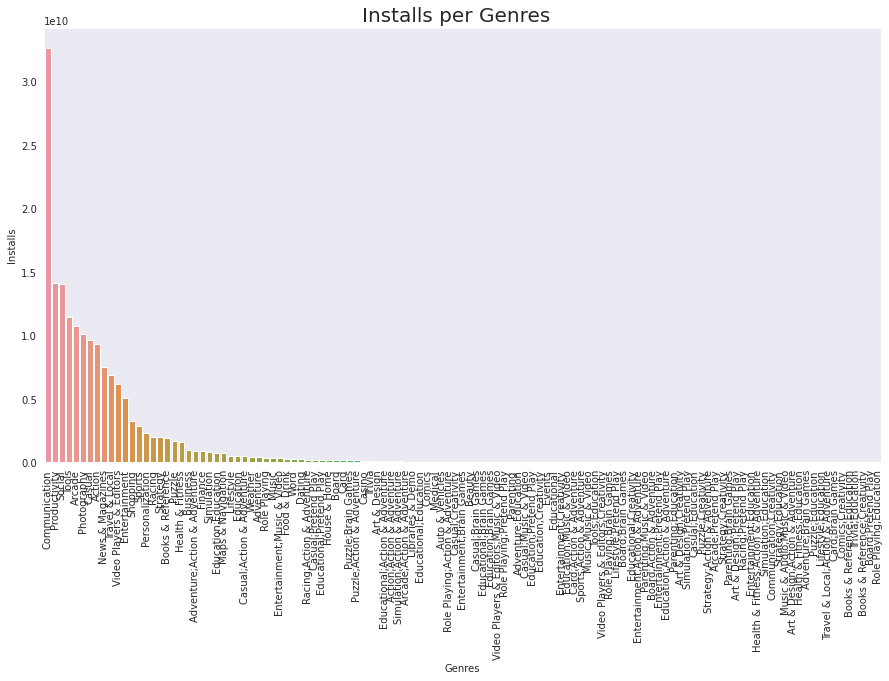

The top 10 Genres in play store are: Communication, Productivity, Social, Tools, Arcade, Photography, Casual, Action, News & Magazines, Travel & Local


In [ ]:
# Chart - 7 visualization code
top_Genres = ps_df.groupby("Genres").Installs.sum().sort_values(ascending = False)
x=top_Genres.head(10).index

plt.figure(figsize=(15,8))
sns.barplot(top_Genres.index,top_Genres.values)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title('Installs per Genres  ',size = 20)
plt.xticks(rotation=90)
plt.show()


print(f'The top 10 Genres in play store are: {", ".join(top_Genres.head(10).index[0:10])}')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

The top 10 Genres in play store are: Communication, Productivity, Social, Tools, Arcade, Photography, Casual, Action, News & Magazines, Travel & Local.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Communication and productivity is most installed genre and from above insights we know that the app availabilty is less. Its create positive impact if we developed app in such category.


#### Chart - 8

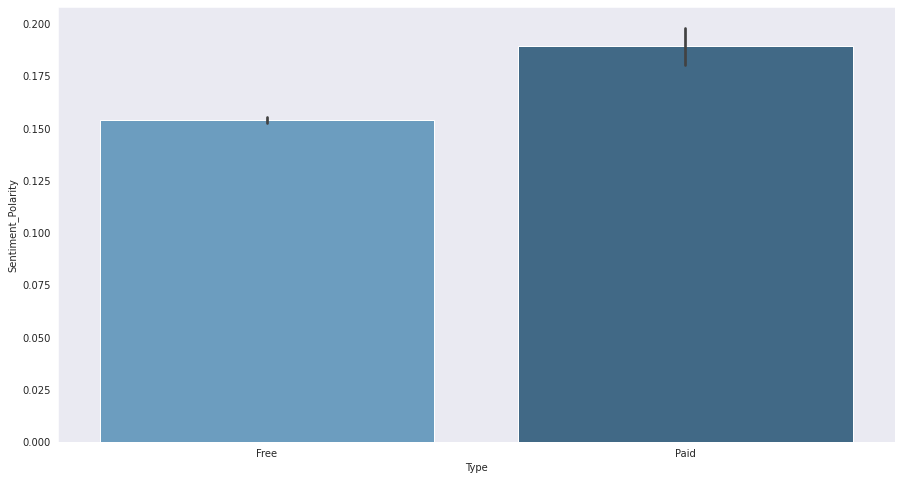

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x='Type',y='Sentiment_Polarity',data = merged_dataframe,palette='Blues_d')
plt.show()

##### 1. Why did you pick the specific chart?

 Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

We found that paid app has more Sentiment_Polarity than free app in playstore .


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because we got sentiment_polarity (opinion of user) its help us to improve our app.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code



##### 1. Why did you pick the specific chart?

To see have much ammount of free and paid app contain in each category in play store.

##### 2. What is/are the insight(s) found from the chart?

The top 5 free and paid installed category are game, family, medical, business,

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

To see content rating for play store apps.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

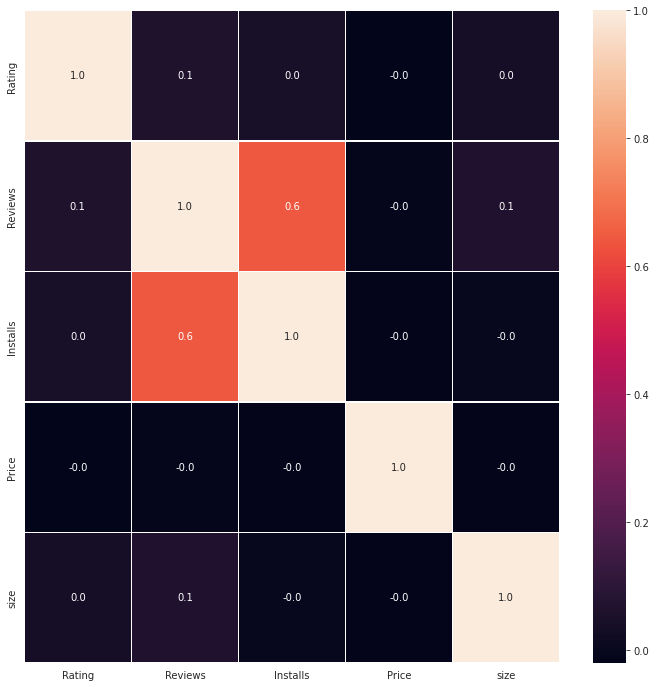

In [ ]:
# Correlation Heatmap visualization code
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(ps_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

To see the co-relation between variables of play store data set .

##### 2. What is/are the insight(s) found from the chart?

Only Reviews and installs are co-related to each others.


#### Chart - 15 - Pair Plot 

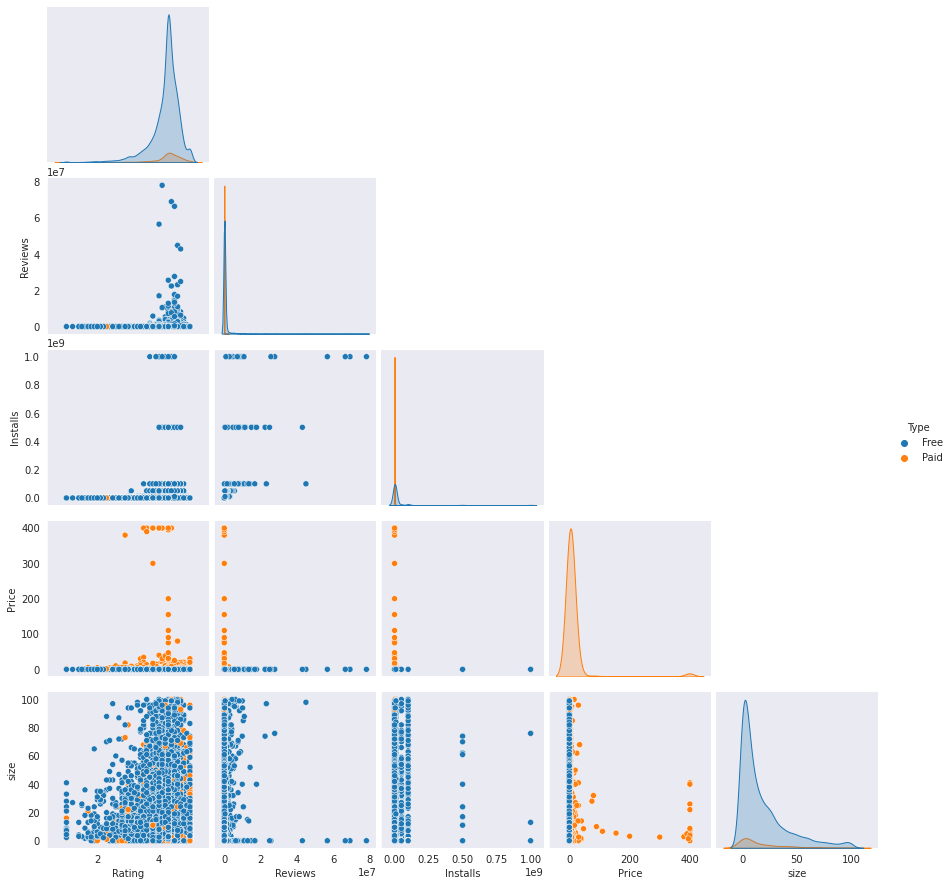

In [ ]:
# Pair Plot visualization code

sns.pairplot(ps_df, hue="Type",corner=True)

##### 1. Why did you pick the specific chart?

To see the relstionship between Rating,Reviews,Installs,Price,Size with Type of app in play store.

##### 2. What is/are the insight(s) found from the chart?



1.   Paid app have less app size comparely free app.
2.   paid app has maximum rating comparely free app.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.



1.   The most installed paid app are from finance and lifestyle hence develope paid app for these categories are beneficial.
2.   The most free app installed from play store are from Game, Communication,  Social, Productivity,Tools categories. Its beneficial to develope app from this categories.

1.  The Beauty Industry is worth more yet it is the category with the fewest app. Developing Beauty Industry app has the potential for great success since the catogory has yet to receive large investments.
 





# **Conclusion**



1.   The apps from the categories like GAME,COMMUNICATION, SOCIAL, PRODUCTIVITY, TOOLS of having the highest amount of installs, rating and reviews.
2.   Top 5 most expensive app are mostly from FINANCE and LIFESTYLE category.

1.   Paid apps have more sentiment polarity than free appps and their are 92.6% are free app and only 7.4% paid app in play store.
2.   The most costly app in play store is I'm Rich-Trump Edition and price is 400$.





### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***